In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
raw_data = pd.read_csv('../MNIST_CSV/mnist_train.csv')

In [76]:
data = raw_data.to_numpy()
np.random.shuffle(data)

In [77]:
Y = data[1:,0]
X = data[1:,1:]/255
N, D = X.shape
K = len(set(Y))


In [79]:
def one_hard(local_data, n, k):
    oh_Y = np.zeros((n, k))
    for i in range(n):
        oh_Y[i, local_data[i]] = 1
    return oh_Y


In [80]:
Y = one_hard(Y, N, K)

In [82]:
W = np.random.randn(D, K)
B = np.random.randn(K)

In [83]:
def softmax(local_data):
    expa = np.exp(local_data)
    return expa/expa.sum(axis=1, keepdims=True)

In [84]:
def forward(x, w, b):
    return softmax(x.dot(w) + b)

In [ ]:
def loss_function(py, t):
    epsilon = 1e-12
    py = np.clip(py, epsilon, 1 - epsilon)
    return -(t * np.log(py)).sum()


In [86]:
def predict(py):
    return np.argmax(py, axis=1)

In [87]:
epochs = 400
l_rate = 0.1
loss_rate = []

for i in range(epochs):
    py = forward(X, W, B)
    loss = loss_function(py, Y)
    loss_rate.append(loss)
    W -= l_rate * X.T.dot(py - Y) / N
    B -= l_rate * (py - Y).sum(axis=0) / N


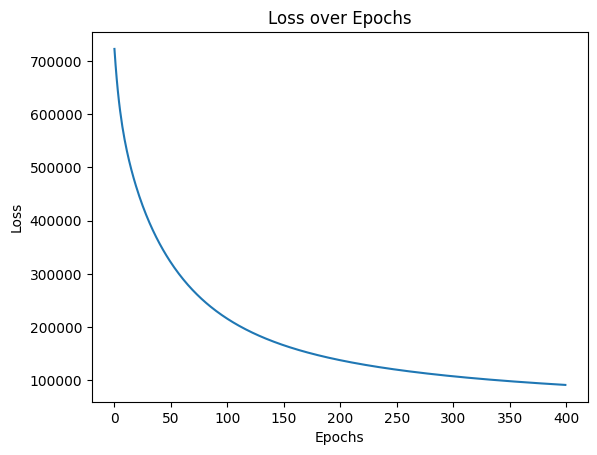

In [88]:
plt.plot(loss_rate)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [89]:
p = predict(py)
y = predict(Y)

res = np.sum([p==y])/N

In [90]:
res

0.7013067102236741